## **Section 1: Introduction and Summary**

This notebook intends to analyze, compare, and provide insights on the performance of two fundamentally different approaches to **portfolio risk modelling and risk-adjusted portfolio construction**:

- One **machine-learning–based risk modelling framework**, and  
- One **Monte Carlo simulation–based risk modelling framework**.

The comparison is conducted across the following dimensions:

**1. Risk Capture and Sensitivity:**  
How effectively each approach captures volatility dynamics, downside risk, tail behavior, and regime-dependent uncertainty embedded in historical return series.

**2. Stability of Risk Estimates:**  
The robustness and consistency of estimated risk inputs—particularly volatility and covariance—under evolving market conditions and across rebalancing windows.

**3. Portfolio Construction and Rebalancing Outcomes:**  
How differences in risk estimation propagate into portfolio weights, diversification properties, and realized risk-adjusted performance over time.

Based on the findings above, this notebook aims to determine **Model Applicability**—that is, which framework is better suited for **risk estimation, portfolio optimization support, and stress-aware decision making**, rather than return forecasting.

Additionally, the notebook explains the underlying mechanics—both mathematically and intuitively—of each approach, enabling a clear understanding of how uncertainty is modelled and translated into portfolio decisions.

---

**Dataset Description**

The analysis uses **daily closing price data** spanning approximately **2001–2026**, covering multiple market regimes including the Global Financial Crisis (2008), the COVID-19 shock (2020), and the post-pandemic monetary tightening cycle.

The asset universe is intentionally restricted to three broad instruments to emphasize **diversification, correlation structure, and regime behavior**, rather than security-selection alpha:

1. **NIFTY 50 Index** – proxy for broad Indian equity market exposure (sourced from Zerodha using Kite API)
2. **NIFTY Bank Index** – proxy for cyclical, leverage-sensitive financial equities (sourced from Zerodha using Kite API)
3. **Gold** – proxy for defensive and inflation-hedging behavior (sourced from Yahoo Finance - COMEX Gold Futures - CMEGroup - GC=F)

Daily prices are transformed into **logarithmic returns**, which form the foundational input for all subsequent modelling stages. Log returns ensure time-additivity, scale consistency, and comparability across assets with heterogeneous price levels.

---

**Analytical Objective**

Unlike return-forecasting exercises, this notebook focuses explicitly on **risk estimation and portfolio behavior**.

The primary objectives are to:

- Estimate asset-level and portfolio-level risk under different modelling paradigms  
- Construct portfolios using a **fixed, risk-adjusted optimization rule**  
- Evaluate how alternative risk models influence:
  - Estimated volatility and covariance structure  
  - Optimal portfolio weights  
  - Realized post-rebalancing performance  

Importantly, the notebook does **not** attempt to predict future prices or returns directly. Instead, it evaluates how different risk-modelling philosophies interpret uncertainty and how that uncertainty affects portfolio outcomes.

---

**Modelling Approach**

Two distinct and complementary modelling frameworks are implemented.

*Monte Carlo Risk Modelling*

The Monte Carlo framework represents a **distribution-based, probabilistic approach** to risk estimation. Using historical return data, the model:

- Estimates expected returns and covariance structure  
- Simulates a large number of potential future return paths  
- Aggregates simulated outcomes to infer portfolio-level risk measures  

This approach explicitly models **distributional uncertainty** and is particularly well-suited for understanding tail risk and scenario dispersion.

*Machine Learning Risk Modelling*

The machine learning framework treats **risk as a conditional, learnable function of historical return dynamics**. Rather than assuming a fixed parametric distribution, the model infers patterns such as:

- Volatility clustering  
- Non-linear dependencies  
- Regime-dependent behavior  

Engineered features encode memory, dispersion, and drawdown effects observed in financial time series. Model outputs are used to generate **forward-looking volatility estimates**, which feed directly into portfolio construction.

---

**Portfolio Construction and Evaluation**

Portfolio construction is governed by a **single, fixed decision rule** applied consistently across both modelling approaches.

- **Risk-adjusted return metric:** Sharpe ratio  
- **Optimization objective:** Maximize Sharpe ratio  
- **Constraints:**  
  - Long-only  
  - Fully invested  

By comparing **pre- and post-rebalancing portfolios under each risk model and portfolio construction rule**, the notebook highlights how **model choice alone can materially alter portfolio behavior—even when using the same underlying assets**.

Evaluation focuses on:

- Portfolio volatility  
- **Risk-adjusted return metrics: Sharpe**  
- Drawdown and tail-risk characteristics  
- Stability of portfolio weights and turnover

---

**Project Methodology**

The empirical analysis follows a structured, walk-forward research design to ensure methodological rigor and avoid look-ahead bias.

*Step 1: Data Collection and Cleansing*

Three independent price series are sourced:

- NIFTY 50 prices  
- NIFTY Bank prices  
- Gold price proxy  

All datasets are:

- Cleaned for missing observations  
- Aligned to a common date range  
- Prepared to ensure consistency across assets

*Step 2: Computation of Daily Log Returns*

For each asset:

- Daily log returns are computed  
- This return series constitutes the **only shared input across all models**  

All downstream modelling—Monte Carlo and ML—is built exclusively on this return representation.

*Step 3: Feature Engineering (Asset-Specific)*

For each asset independently, the following features are engineered:

- Rolling volatility estimates (20-day, 60-day)  
- Lagged return terms  
- Rolling mean returns  
- Drawdown-based measures  

These features are **used exclusively by the machine learning framework** and are not inputs to the Monte Carlo simulation.

*Step 4: Portfolio Decision Rule Definition*

Prior to any modelling, the portfolio construction rule is defined **once and fixed throughout the study**.

- **Objective:** Maximize Sharpe ratio  
- **Constraints:**  
  - Long-only (only positive positions held in assets - no short positions considered)
  - Fully invested (portfolio weight = 100%)

This ensures that differences in outcomes arise solely from **risk estimation**, not from changing optimization logic.

*Step 5: Walk-Forward Portfolio Construction*

This step constitutes the core of the project and is repeated at each monthly rebalancing date.

*Step 5A — Monte Carlo Risk Estimation*

At rebalancing date $T$:

- Use only historical returns available up to $T$ (e.g., trailing 3 years)  
- Estimate:
  - Mean returns  
  - Covariance matrix (volatility and correlations)  
- Run Monte Carlo simulations to generate future return paths  
- Compute risk inputs for portfolio optimization  
- Pass these inputs into the Sharpe optimizer  
- Obtain portfolio weights:

$$
(x^{MC}, y^{MC}, z^{MC})
$$

*Step 5B — Machine Learning Risk Estimation*

At the same rebalancing date $T$:

- Train ML models (per asset) using only historical features  
- Predict next-period volatility for each asset  
- Combine predicted volatilities with rolling correlation estimates  
- Construct a forecasted covariance matrix  
- Pass these inputs into the same Sharpe optimizer  
- Obtain portfolio weights:

$$
(x^{ML}, y^{ML}, z^{ML})
$$

*Step 6: Out-of-Sample Holding Period*

- Both portfolios are held for the subsequent month  
- Realized portfolio returns are recorded  

*Step 7: Iteration Through Time*

Steps 5 and 6 are repeated across the full sample period, generating:

- A Monte Carlo–based portfolio return series  
- A Machine Learning–based portfolio return series  

*Step 8: Comparative Evaluation*

The two portfolios are compared across:

- Sharpe ratio  
- Maximum drawdown  
- Conditional Value-at-Risk (CVaR)  
- Volatility  
- Turnover  
- Behavior during market stress periods

---

**Disclaimer**

This notebook is intended solely for **methodological comparison and analytical insight**. The portfolios constructed are illustrative and do not constitute investment advice. Both modelling frameworks rely on historical information and implicitly assume that past statistical properties are informative of future risk. In practice, financial markets are subject to **structural breaks, policy interventions, and exogenous shocks** that may invalidate these assumptions. Accordingly, results should be interpreted as **indicative rather than definitive**, and any real-world deployment would require additional validation, stress testing, and governance controls.

In [6]:
# Importing necessary packages

import os, cudf, cupy, time
from dotenv import load_dotenv
import matplotlib.pyplot as plt, matplotlib.dates as mdates

## **Section 2: Data Load and Visualization**

Since the raw data has already been pre-processed using a separate ETL pipeline (please refer to GitHub repo: https://github.com/thenaivecoder89/statistical_and_machine_learning_models/tree/main/data_sourcing filename: ZERODHA_YFINANCE_ETL_PROJECT_3.py for the full ETL codebase), this section will focus more on loading the pre-processed data and visualizing the same.

NIFTY 50 Data Plot


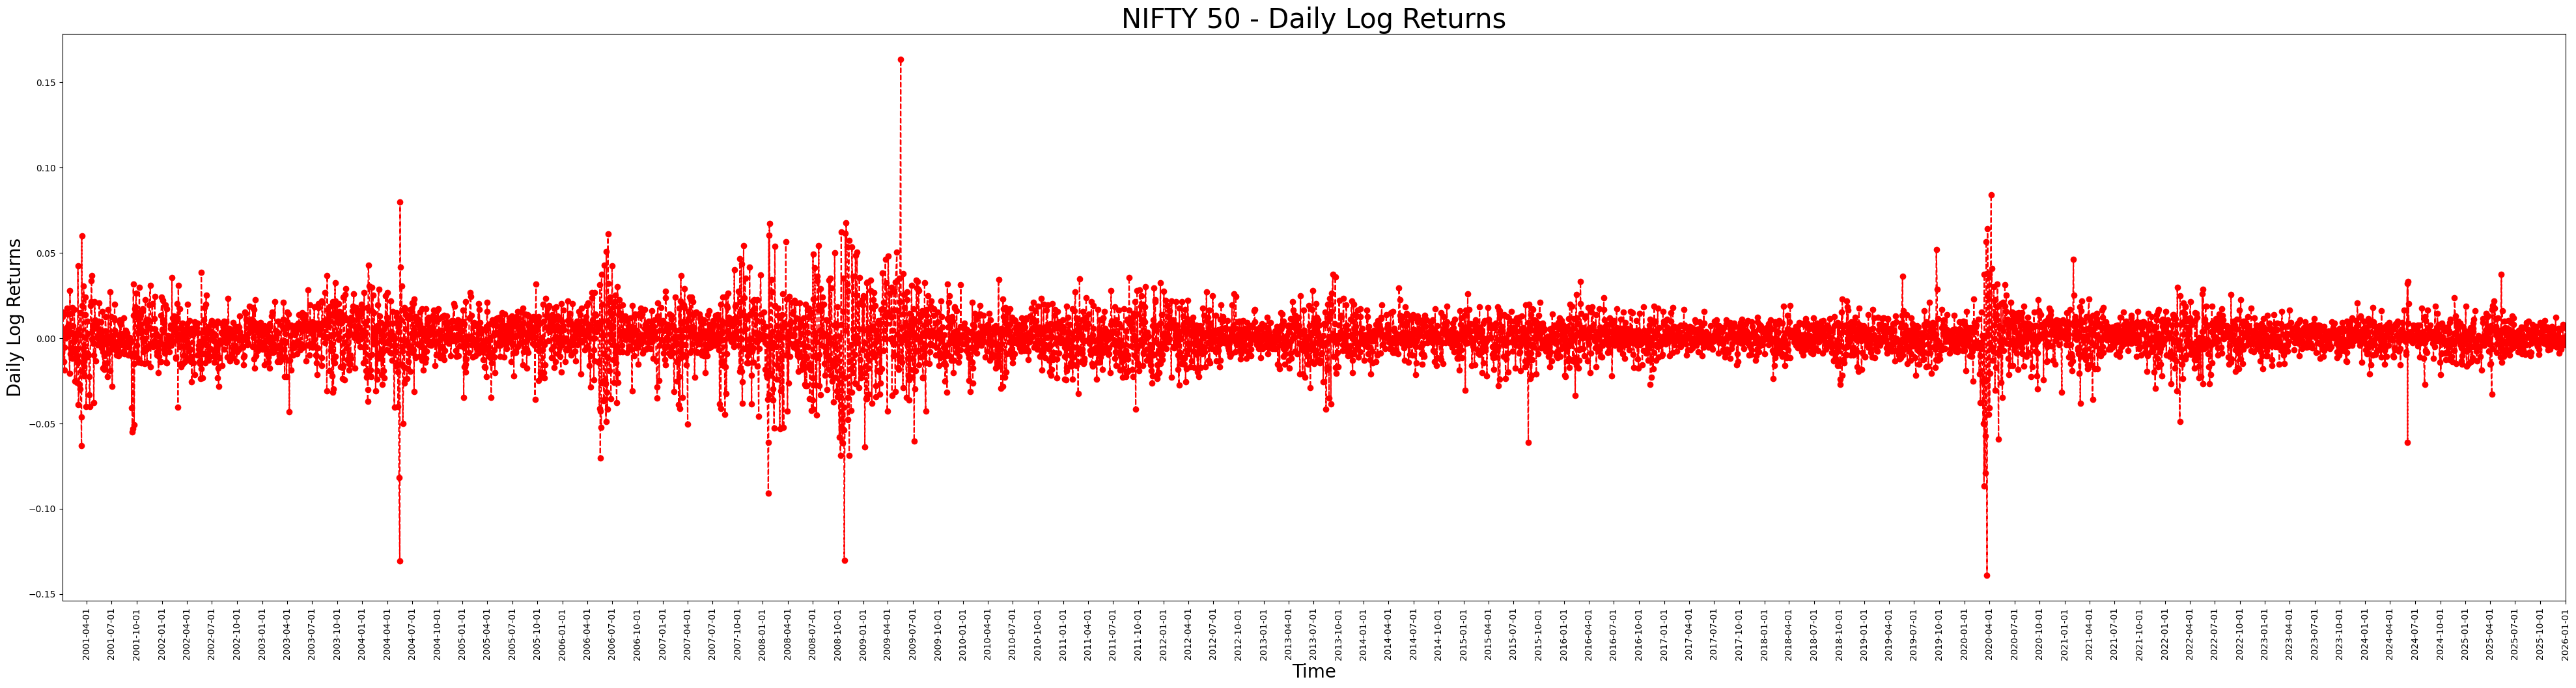

NIFTY Bank Data Plot


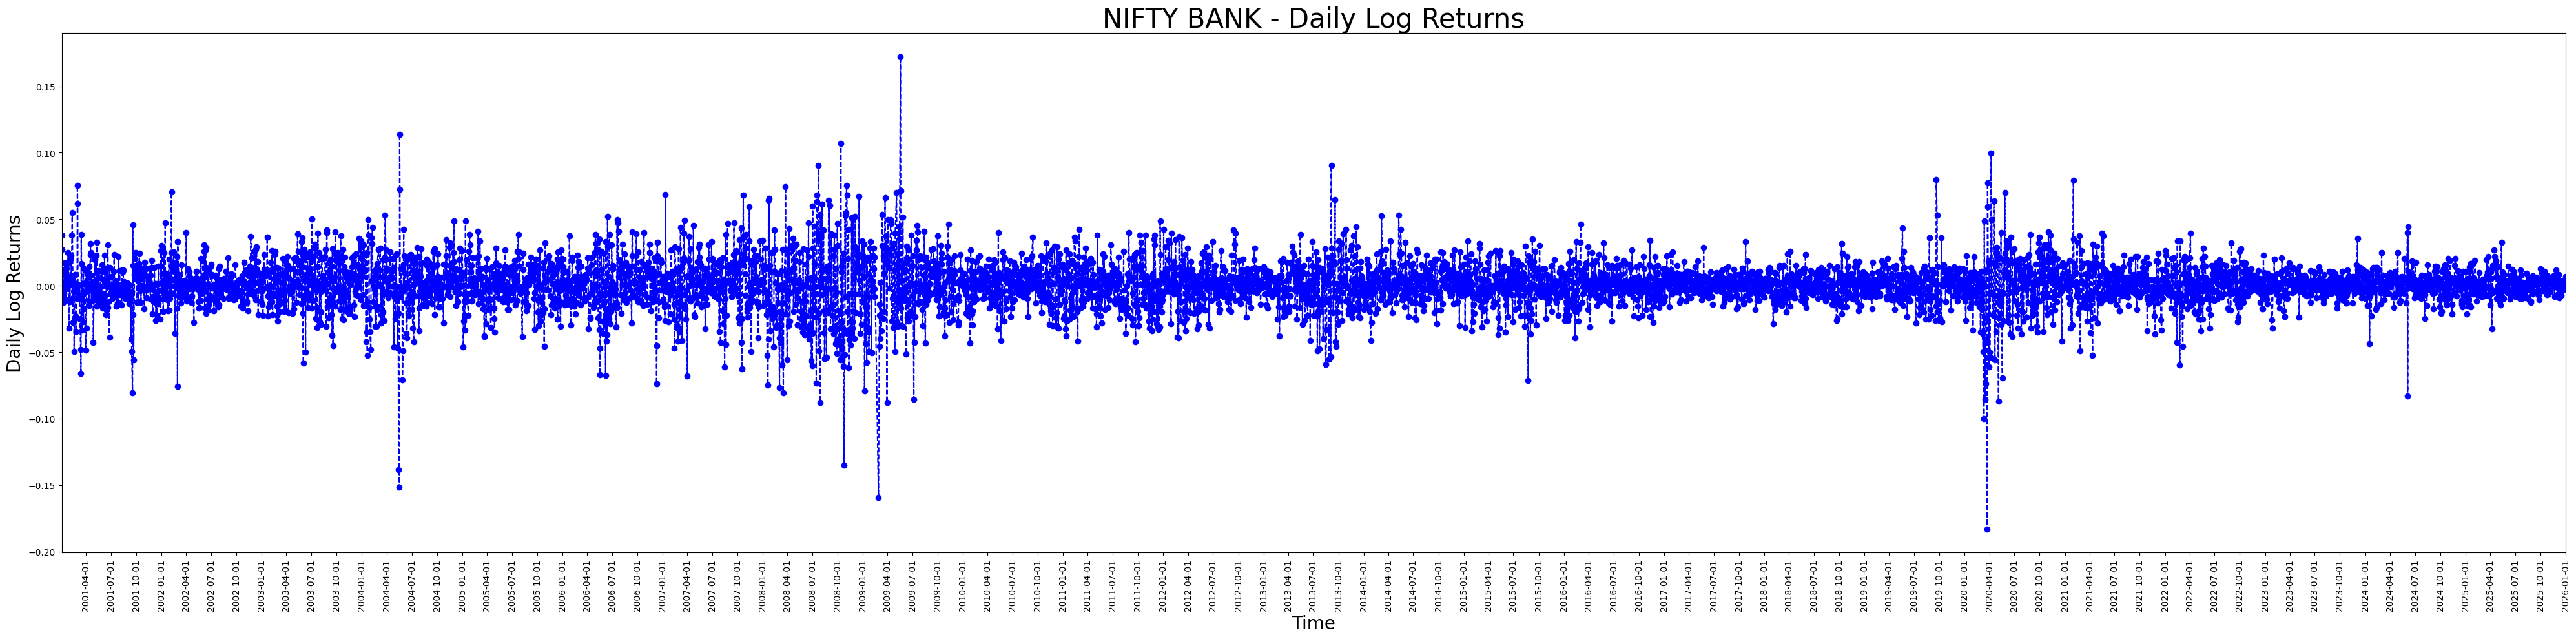

In [ ]:
# Record program start time
start_time = time.perf_counter()

# Initialize environment
load_dotenv()
kite_nifty50_daily_historical_data = os.getenv('kite_nifty50_daily_historical_data')
kite_niftybank_daily_historical_data = os.getenv('kite_niftybank_daily_historical_data')
gold_daily_historical_data = os.getenv('gold_daily_historical_data')

# Load Data
nifty50_cudf = cudf.read_csv(kite_nifty50_daily_historical_data)
niftybank_cudf = cudf.read_csv(kite_niftybank_daily_historical_data)
goldfutures_df = cudf.read_csv(gold_daily_historical_data)

# Plot Data
print('NIFTY 50 Data Plot')
fig, ax = plt.subplots(figsize=(40, 10), dpi=100)
nifty50_cudf['date'] = cudf.to_datetime(nifty50_cudf['date'])
ax.plot(nifty50_cudf['date'], nifty50_cudf['daily_log_closing_value'], '--', color='red', marker='o')
ax.set_title('NIFTY 50 - Daily Log Returns', fontsize=30)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Daily Log Returns', fontsize=20)
ax.set_xlim(nifty50_cudf['date'].min(), nifty50_cudf['date'].max())
ax.xaxis.set_major_locator(mdates.MonthLocator([1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()
print('=======================================================================')
print('NIFTY Bank Data Plot')
niftybank_cudf['date'] = cudf.to_datetime(niftybank_cudf['date'])
fig, ax = plt.subplots(figsize=(40, 10), dpi=100)
ax.plot(niftybank_cudf['date'], niftybank_cudf['daily_log_closing_value'], '--', color='blue', marker='o')
ax.set_title('NIFTY BANK - Daily Log Returns', fontsize=30)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Daily Log Returns', fontsize=20)
ax.set_xlim(niftybank_cudf['date'].min(), niftybank_cudf['date'].max())
ax.xaxis.set_major_locator(mdates.MonthLocator([1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()